<a href="https://colab.research.google.com/github/Acting24/exemplo---colaboratory/blob/main/Univesp_Web_Crawler_Colab_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕷️ Web Crawler da Univesp com Análise de Frequência de Palavras

---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SEU_USUARIO/SEU_REPOSITORIO/blob/main/Univesp_Web_Crawler_Colab.ipynb)
[![GitHub](https://img.shields.io/badge/GitHub-Repository-blue?logo=github)](https://github.com/SEU_USUARIO/SEU_REPOSITORIO)
[![License](https://img.shields.io/badge/License-MIT-green.svg)](https://opensource.org/licenses/MIT)

## 📋 Descrição do Projeto

Este notebook implementa um **web crawler** que visita sistematicamente as páginas da Univesp, seguindo hyperlinks e analisando a frequência de palavras encontradas. O projeto foi desenvolvido como parte do **Desafio Semana 4** e demonstra técnicas de:

- 🌐 **Web Scraping** e crawling sistemático
- 📊 **Análise de texto** e processamento de linguagem natural
- 📈 **Visualização de dados** com gráficos interativos
- 🐍 **Programação Python** com bibliotecas especializadas

---

### 🎯 Objetivos
1. Implementar um crawler que navega automaticamente pelo site da Univesp
2. Extrair e limpar texto de páginas HTML
3. Analisar frequência de palavras com filtros inteligentes
4. Gerar visualizações e relatórios detalhados
5. Criar uma ferramenta reutilizável e bem documentada

### 🚀 Como Usar Este Notebook
1. **Execute as células sequencialmente** usando `Shift + Enter`
2. **Ajuste os parâmetros** na seção de configuração conforme necessário
3. **Visualize os resultados** nas seções de análise e gráficos
4. **Baixe os dados** gerados na seção final

### 📖 Estrutura do Notebook
- **Seção 1:** Configuração e Instalação de Dependências
- **Seção 2:** Implementação do Web Crawler
- **Seção 3:** Processamento e Análise de Texto
- **Seção 4:** Visualizações e Gráficos
- **Seção 5:** Relatórios e Exportação de Dados

---

**Autor:** Desenvolvido para o Desafio Semana 4 - Univesp  
**Data:** 2025  
**Versão:** 1.0  

# 1️⃣ Configuração e Instalação de Dependências

Nesta seção, vamos instalar e importar todas as bibliotecas necessárias para o funcionamento do web crawler.

In [1]:
# 📦 Instalação de bibliotecas necessárias
!pip install requests beautifulsoup4 matplotlib seaborn wordcloud plotly pandas --quiet

print("✅ Todas as dependências foram instaladas com sucesso!")

✅ Todas as dependências foram instaladas com sucesso!


In [2]:
# 📚 Importação de bibliotecas
import re
import time
import html
import unicodedata
from urllib.parse import urljoin, urlparse
from collections import Counter, defaultdict
from datetime import datetime

# Bibliotecas para web scraping
import requests
from bs4 import BeautifulSoup
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# Bibliotecas para análise de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud

# Configurações visuais
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Todas as bibliotecas foram importadas com sucesso!")
print(f"🐍 Python executando no Google Colab")
print(f"⏰ Notebook iniciado em: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")

✅ Todas as bibliotecas foram importadas com sucesso!
🐍 Python executando no Google Colab
⏰ Notebook iniciado em: 17/08/2025 19:11:35


## ⚙️ Configuração de Parâmetros

Aqui você pode ajustar os parâmetros do crawler conforme suas necessidades:

In [3]:
# 🎛️ CONFIGURAÇÕES DO WEB CRAWLER
# ================================

# URL base da Univesp
BASE_URL = "https://univesp.br"

# Número máximo de páginas a visitar
MAX_PAGES = 20  # Reduzido para o Colab (pode aumentar se necessário)

# Delay entre requisições (em segundos)
DELAY = 1.0  # Seja respeitoso com o servidor!

# Timeout para requisições (em segundos)
TIMEOUT = 10

# Headers para simular um navegador real
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'pt-BR,pt;q=0.9,en;q=0.8',
    'Accept-Encoding': 'gzip, deflate',
    'Connection': 'keep-alive',
}

# Lista de stopwords em português
STOPWORDS = {
    'a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até',
    'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois',
    'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'essa', 'essas',
    'esse', 'esses', 'esta', 'estão', 'estas', 'estamos', 'estar', 'este', 'estes',
    'eu', 'foi', 'for', 'foram', 'há', 'isso', 'isto', 'já', 'mais', 'mas', 'me',
    'mesmo', 'meu', 'meus', 'minha', 'minhas', 'na', 'nas', 'não', 'no', 'nos',
    'nós', 'o', 'os', 'ou', 'para', 'pela', 'pelas', 'pelo', 'pelos', 'por',
    'qual', 'quando', 'que', 'quem', 'são', 'se', 'sem', 'ser', 'seu', 'seus',
    'só', 'sua', 'suas', 'também', 'te', 'tem', 'teu', 'teus', 'tu', 'tua',
    'tuas', 'um', 'uma', 'você', 'vocês', 'vos', 'ver', 'anos', 'ano', 'dia', 'dias',
    'pode', 'podem', 'vai', 'vão', 'fazer', 'feito', 'bem', 'muito', 'toda', 'todo',
    'todos', 'todas', 'vez', 'vezes', 'onde', 'aqui', 'ali', 'lá', 'agora', 'então',
    'sobre', 'após', 'durante', 'antes', 'depois', 'enquanto', 'desde', 'será',
    'serão', 'está', 'estão', 'foi', 'foram', 'terá', 'terão', 'até', 'através',
    'além', 'também', 'porém', 'contudo', 'todavia', 'entretanto', 'portanto',
    'assim', 'então', 'logo', 'pois', 'porque', 'porquê', 'quando', 'quanto',
    'qualquer', 'quaisquer', 'algum', 'alguns', 'alguma', 'algumas', 'nenhum',
    'nenhuma', 'outro', 'outra', 'outros', 'outras', 'mesmo', 'mesma', 'mesmos',
    'mesmas', 'tanto', 'tanta', 'tantos', 'tantas', 'quanto', 'quanta', 'quantos',
    'quantas', 'tal', 'tais', 'cada', 'qualquer', 'seja', 'sejam', 'fosse',
    'fossem', 'sendo', 'tendo', 'havendo', 'haver', 'ter', 'fazer', 'dizer',
    'dar', 'ficar', 'ir', 'vir', 'sair', 'chegar', 'voltar', 'passar', 'levar'
}

print(f"⚙️ Configurações do Crawler:")
print(f"   🌐 URL Base: {BASE_URL}")
print(f"   📄 Máximo de páginas: {MAX_PAGES}")
print(f"   ⏱️ Delay entre requisições: {DELAY}s")
print(f"   🚫 Stopwords: {len(STOPWORDS)} palavras filtradas")
print(f"\n✅ Configuração concluída!")

⚙️ Configurações do Crawler:
   🌐 URL Base: https://univesp.br
   📄 Máximo de páginas: 20
   ⏱️ Delay entre requisições: 1.0s
   🚫 Stopwords: 190 palavras filtradas

✅ Configuração concluída!


# 2️⃣ Implementação do Web Crawler

Vamos criar nossa classe principal do web crawler com todas as funcionalidades necessárias.

In [4]:
class UnivespWebCrawler:
    """
    🕷️ Web Crawler da Univesp com Análise de Frequência de Palavras

    Esta classe implementa um crawler completo que:
    - Visita páginas da Univesp sistematicamente
    - Extrai e processa texto de cada página
    - Analisa frequência de palavras
    - Gera estatísticas detalhadas
    """

    def __init__(self, base_url=BASE_URL, max_pages=MAX_PAGES, delay=DELAY):
        self.base_url = base_url
        self.max_pages = max_pages
        self.delay = delay
        self.visited_urls = set()
        self.failed_urls = set()
        self.word_frequency = Counter()
        self.page_word_counts = defaultdict(Counter)
        self.crawl_data = []

        # Configurar sessão HTTP com retry
        self.session = requests.Session()
        retry_strategy = Retry(
            total=3,
            backoff_factor=1,
            status_forcelist=[429, 500, 502, 503, 504],
        )
        adapter = HTTPAdapter(max_retries=retry_strategy)
        self.session.mount("http://", adapter)
        self.session.mount("https://", adapter)

    def is_valid_url(self, url):
        """Verifica se a URL é válida e pertence ao domínio da Univesp"""
        try:
            parsed = urlparse(url)
            return (parsed.netloc.endswith('univesp.br') and
                   parsed.scheme in ['http', 'https'] and
                   not any(ext in url.lower() for ext in ['.pdf', '.jpg', '.png', '.gif', '.zip', '.doc']))
        except:
            return False

    def fetch_page(self, url):
        """Faz o download do conteúdo de uma página"""
        try:
            print(f"🔗 Visitando: {url}")
            response = self.session.get(url, headers=HEADERS, timeout=TIMEOUT)
            response.raise_for_status()

            # Garantir codificação UTF-8
            if response.encoding is None or response.encoding.lower() not in ['utf-8', 'utf8']:
                response.encoding = 'utf-8'

            return response.text
        except Exception as e:
            print(f"❌ Erro ao acessar {url}: {e}")
            self.failed_urls.add(url)
            return None

    def extract_text_and_links(self, html_content, base_url):
        """Extrai texto limpo e links de uma página HTML"""
        try:
            soup = BeautifulSoup(html_content, 'html.parser')

            # Remove scripts, estilos e elementos desnecessários
            for element in soup(["script", "style", "nav", "footer", "header"]):
                element.decompose()

            # Extrai texto
            text = soup.get_text()

            # Limpa o texto
            lines = (line.strip() for line in text.splitlines())
            chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
            clean_text = ' '.join(chunk for chunk in chunks if chunk)

            # Extrai links
            links = []
            for link in soup.find_all('a', href=True):
                absolute_url = urljoin(base_url, link['href'])
                if self.is_valid_url(absolute_url):
                    links.append(absolute_url)

            return clean_text, list(set(links))  # Remove duplicatas

        except Exception as e:
            print(f"❌ Erro ao processar HTML: {e}")
            return "", []

    def process_text(self, text):
        """Processa texto para contar palavras"""
        if not text:
            return Counter()

        # Normalizar Unicode (resolver problemas de codificação)
        text = unicodedata.normalize('NFC', text)

        # Converte para minúsculas
        text = text.lower()

        # Encontra palavras (incluindo acentos portugueses)
        words = re.findall(r'\b[a-zA-ZáàâãäéèêëíìîïóòôõöúùûüçñÁÀÂÃÄÉÈÊËÍÌÎÏÓÒÔÕÖÚÙÛÜÇÑ]+\b', text)

        # Filtra palavras muito curtas e stopwords
        filtered_words = [word for word in words
                         if len(word) > 2 and word not in STOPWORDS]

        return Counter(filtered_words)

    def crawl_page(self, url):
        """Processa uma página específica"""
        # Download da página
        html_content = self.fetch_page(url)
        if not html_content:
            return []

        # Extrai texto e links
        text, links = self.extract_text_and_links(html_content, url)

        # Processa texto
        if text:
            word_count = self.process_text(text)
            self.page_word_counts[url] = word_count
            self.word_frequency.update(word_count)

            # Armazena dados para análise posterior
            self.crawl_data.append({
                'url': url,
                'text_length': len(text),
                'word_count': sum(word_count.values()),
                'unique_words': len(word_count),
                'timestamp': datetime.now()
            })

        return links

    def crawl(self):
        """Executa o processo principal de crawling"""
        print("🕷️ INICIANDO WEB CRAWLER DA UNIVESP")
        print("=" * 50)
        print(f"🌐 URL inicial: {self.base_url}")
        print(f"📄 Máximo de páginas: {self.max_pages}")
        print(f"⏱️ Delay: {self.delay}s")
        print()

        start_time = time.time()
        urls_to_visit = [self.base_url]

        while urls_to_visit and len(self.visited_urls) < self.max_pages:
            current_url = urls_to_visit.pop(0)

            if current_url in self.visited_urls:
                continue

            self.visited_urls.add(current_url)

            # Processa a página
            new_links = self.crawl_page(current_url)

            # Adiciona novos links
            for link in new_links:
                if (link not in self.visited_urls and
                    link not in urls_to_visit and
                    link not in self.failed_urls):
                    urls_to_visit.append(link)

            # Progresso
            if len(self.visited_urls) % 5 == 0:
                print(f"📈 Progresso: {len(self.visited_urls)}/{self.max_pages} páginas")

            # Delay
            time.sleep(self.delay)

        end_time = time.time()

        print(f"\n✅ Crawling concluído!")
        print(f"📊 Páginas visitadas: {len(self.visited_urls)}")
        print(f"❌ Páginas com erro: {len(self.failed_urls)}")
        print(f"⏱️ Tempo total: {end_time - start_time:.2f} segundos")
        print(f"📝 Palavras únicas encontradas: {len(self.word_frequency)}")
        print(f"🔤 Total de ocorrências: {sum(self.word_frequency.values())}")

        return True

    def get_dataframe(self):
        """Retorna os dados do crawl como DataFrame do pandas"""
        return pd.DataFrame(self.crawl_data)

    def get_word_frequency_df(self, top_n=100):
        """Retorna as palavras mais frequentes como DataFrame"""
        top_words = self.word_frequency.most_common(top_n)
        return pd.DataFrame(top_words, columns=['palavra', 'frequencia'])

print("✅ Classe UnivespWebCrawler criada com sucesso!")

✅ Classe UnivespWebCrawler criada com sucesso!


## 🚀 Executando o Web Crawler

Agora vamos criar uma instância do crawler e executá-lo:

In [5]:
# 🕷️ Criar e executar o crawler
crawler = UnivespWebCrawler(
    base_url=BASE_URL,
    max_pages=MAX_PAGES,
    delay=DELAY
)

# Executar o crawling
sucesso = crawler.crawl()

🕷️ INICIANDO WEB CRAWLER DA UNIVESP
🌐 URL inicial: https://univesp.br
📄 Máximo de páginas: 20
⏱️ Delay: 1.0s

🔗 Visitando: https://univesp.br
🔗 Visitando: https://univesp.br/noticias/univesp-realiza-aula-magna-com-marcelo-tas
🔗 Visitando: http://apps.univesp.br/repositorio/
🔗 Visitando: https://univesp.br/noticias/univesp-e-reconhecida-com-o-selo-o-cliente-recomenda
🔗 Visitando: https://univesp.br/noticias/leonardo-castro-assume-a-chefia-de-gabinete-da-univesp
📈 Progresso: 5/20 páginas
🔗 Visitando: https://univesp.br/noticias/polo-mirassol-estacao-crianca-leva-oficinas-ludicas-a-praca-da-matriz-a-partir-de-sabado
🔗 Visitando: https://univesp.br/noticias/univesp-inaugura-polo-na-escola-da-inclusao
🔗 Visitando: https://univesp.br/noticias/resposta-em-relacao-ao-novo-marco-da-ead
🔗 Visitando: https://univesp.br/noticias/aluno-da-univesp-vence-hackathon-de-inteligencia-artificial-da-aws-e-insper
🔗 Visitando: https://univesp.br/noticias/escola-da-inclusao-da-sedpcd-abre-inscricoes-para-curs

# 3️⃣ Análise dos Dados Coletados

Agora vamos analisar os dados coletados pelo nosso crawler.

In [6]:
# 📊 Análise básica dos dados
if sucesso:
    print("📈 ANÁLISE DOS DADOS COLETADOS")
    print("=" * 40)

    # Estatísticas gerais
    df_pages = crawler.get_dataframe()
    df_words = crawler.get_word_frequency_df(50)

    print(f"\n🔍 Estatísticas Gerais:")
    print(f"   📄 Total de páginas processadas: {len(df_pages)}")
    print(f"   🔤 Palavras únicas encontradas: {len(crawler.word_frequency)}")
    print(f"   📊 Total de ocorrências de palavras: {sum(crawler.word_frequency.values())}")
    print(f"   📝 Média de palavras por página: {df_pages['word_count'].mean():.1f}")
    print(f"   📏 Média de caracteres por página: {df_pages['text_length'].mean():.1f}")

    print(f"\n🏆 TOP 15 PALAVRAS MAIS FREQUENTES:")
    print("-" * 45)
    for i, (palavra, freq) in enumerate(df_words.head(15).values, 1):
        print(f"{i:2d}. {palavra:<20} : {freq:>4} ocorrências")

    # Criar DataFrames para uso posterior
    print(f"\n✅ DataFrames criados:")
    print(f"   📊 df_pages: {len(df_pages)} linhas (dados por página)")
    print(f"   🔤 df_words: {len(df_words)} linhas (frequência de palavras)")
else:
    print("❌ Erro durante o crawling. Verificar logs acima.")

📈 ANÁLISE DOS DADOS COLETADOS

🔍 Estatísticas Gerais:
   📄 Total de páginas processadas: 20
   🔤 Palavras únicas encontradas: 3884
   📊 Total de ocorrências de palavras: 13785
   📝 Média de palavras por página: 689.2
   📏 Média de caracteres por página: 8180.7

🏆 TOP 15 PALAVRAS MAIS FREQUENTES:
---------------------------------------------
 1. univesp              :  185 ocorrências
 2. educação             :  103 ocorrências
 3. hospitalar           :   92 ocorrências
 4. escola               :   60 ocorrências
 5. curso                :   60 ocorrências
 6. inclusão             :   55 ocorrências
 7. ensino               :   54 ocorrências
 8. cursos               :   47 ocorrências
 9. universidade         :   47 ocorrências
10. classe               :   47 ocorrências
11. alunos               :   46 ocorrências
12. trabalho             :   46 ocorrências
13. dados                :   44 ocorrências
14. formação             :   44 ocorrências
15. atividades           :   44 ocorrênci

In [7]:
# 📋 Detalhes das páginas coletadas
if not df_pages.empty:
    print("📄 DETALHES DAS PÁGINAS COLETADAS")
    print("=" * 40)

    # Exibir as primeiras páginas
    display(df_pages.head())

    print("\n📊 Estatísticas descritivas:")
    display(df_pages[['text_length', 'word_count', 'unique_words']].describe())

📄 DETALHES DAS PÁGINAS COLETADAS


,url,text_length,word_count,unique_words,timestamp
0,https://univesp.br,1134,109,96,2025-08-17 19:11:35.977990
1,https://univesp.br/noticias/univesp-realiza-au...,4075,360,258,2025-08-17 19:11:37.502800
2,http://apps.univesp.br/repositorio/,4450,358,255,2025-08-17 19:11:42.928413
3,https://univesp.br/noticias/univesp-e-reconhec...,2884,248,188,2025-08-17 19:11:44.474158
4,https://univesp.br/noticias/leonardo-castro-as...,2671,231,156,2025-08-17 19:11:46.228901



📊 Estatísticas descritivas:


,text_length,word_count,unique_words
count,20.000000,20.000000,20.000000
mean,8180.700000,689.250000,350.350000
std,11746.333964,968.431172,378.205635
min,997.000000,91.000000,80.000000
25%,1624.750000,144.500000,122.500000
50%,2881.500000,261.000000,187.000000
75%,7266.500000,620.750000,369.750000
max,41259.000000,3411.000000,1315.000000


# 4️⃣ Visualizações e Gráficos

Vamos criar visualizações interessantes dos dados coletados.

☁️ Criando Word Cloud...


/tmp/ipython-input-3773643271.py:22: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3773643271.py:22: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


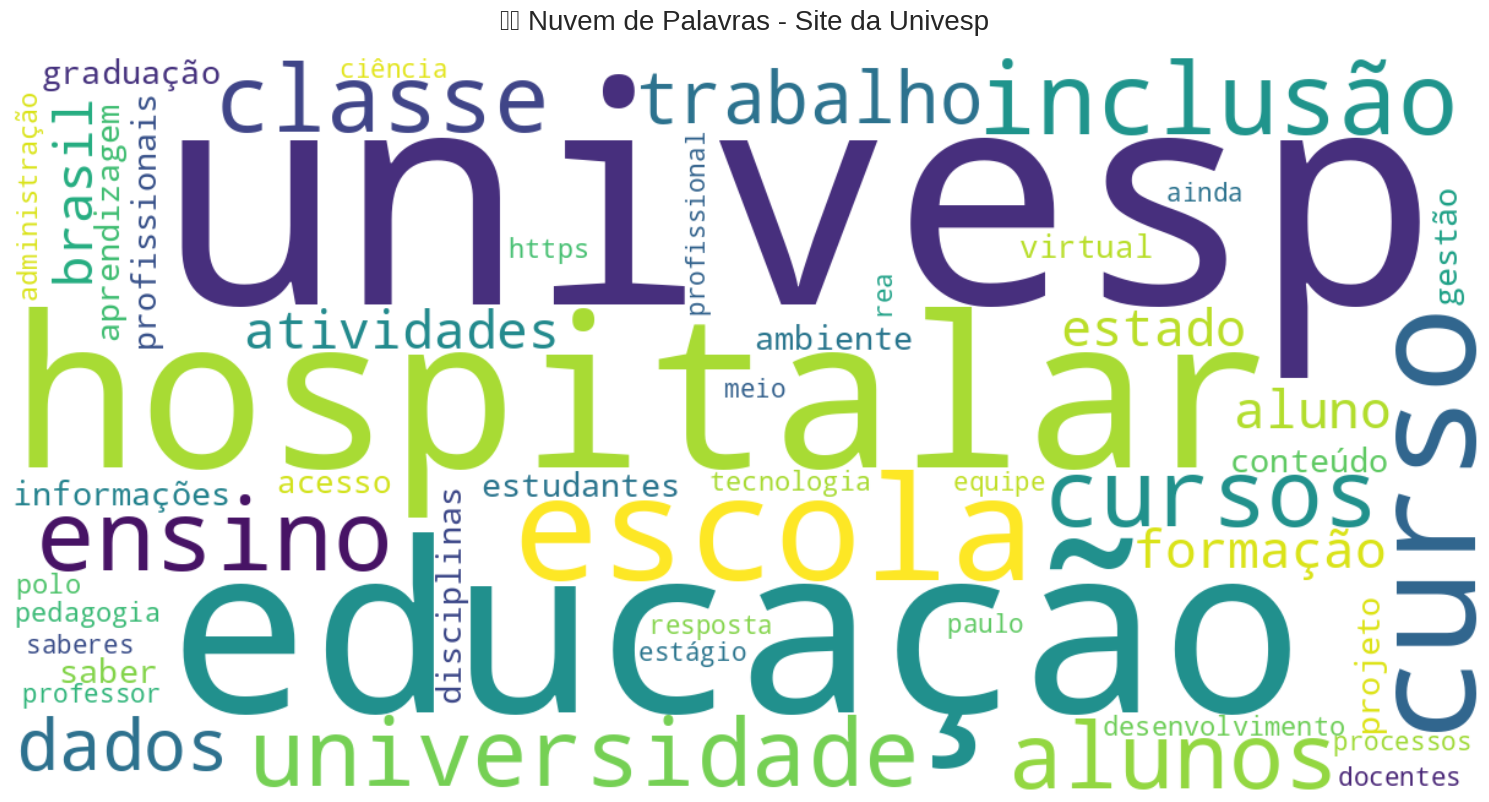

✅ Word Cloud criada com sucesso!


In [8]:
# 🌟 Word Cloud das palavras mais frequentes
if not df_words.empty:
    print("☁️ Criando Word Cloud...")

    # Preparar dados para word cloud
    word_freq_dict = dict(zip(df_words['palavra'], df_words['frequencia']))

    # Criar word cloud
    plt.figure(figsize=(15, 8))

    wordcloud = WordCloud(
        width=1200, height=600,
        background_color='white',
        colormap='viridis',
        max_words=100,
        min_font_size=10
    ).generate_from_frequencies(word_freq_dict)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('☁️ Nuvem de Palavras - Site da Univesp', fontsize=20, pad=20)
    plt.tight_layout()
    plt.show()

    print("✅ Word Cloud criada com sucesso!")

📊 Criando gráfico de barras...


/tmp/ipython-input-3061641041.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


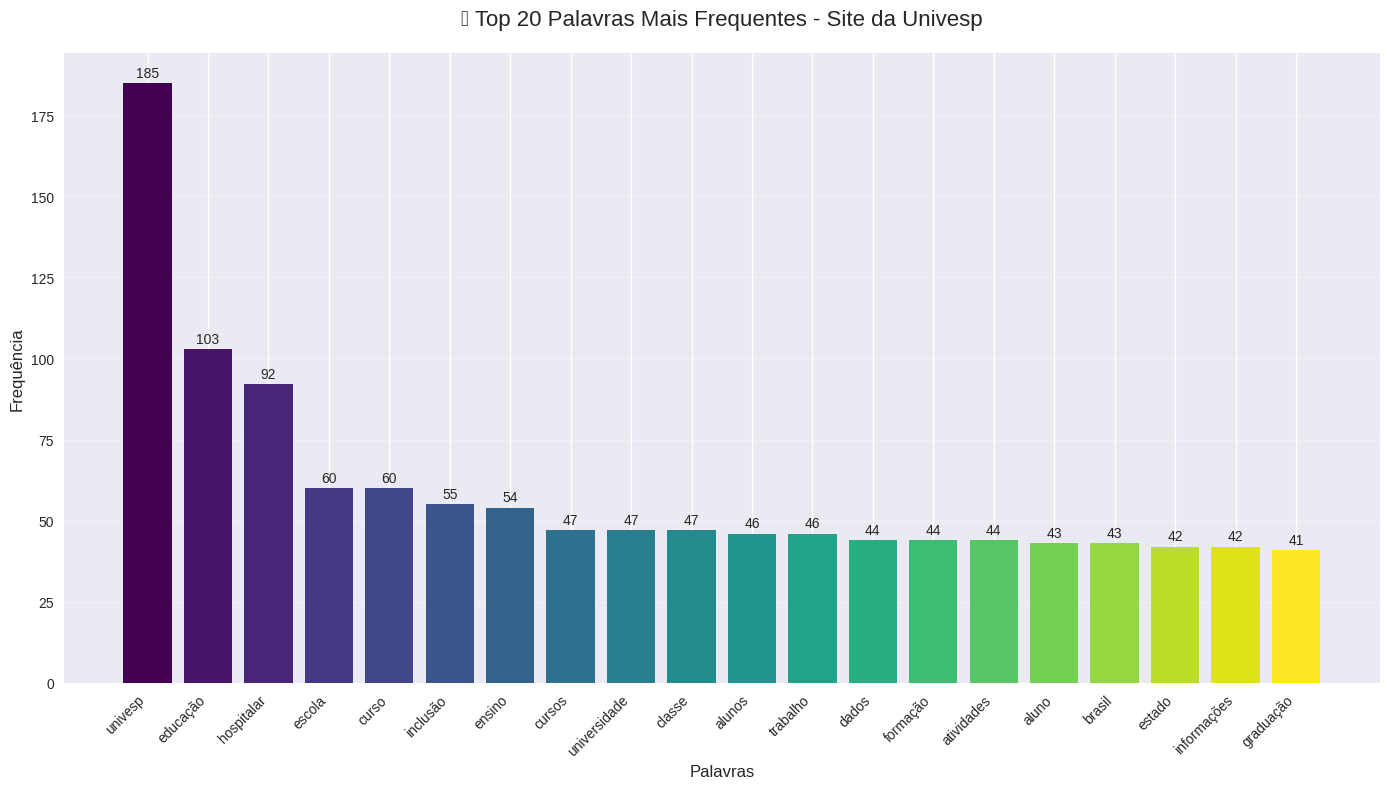

✅ Gráfico de barras criado com sucesso!


In [9]:
# 📊 Gráfico de barras das palavras mais frequentes
if not df_words.empty:
    print("📊 Criando gráfico de barras...")

    # Top 20 palavras
    top_20 = df_words.head(20)

    plt.figure(figsize=(14, 8))

    # Criar gráfico de barras
    bars = plt.bar(range(len(top_20)), top_20['frequencia'],
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_20))))

    plt.xlabel('Palavras', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.title('📊 Top 20 Palavras Mais Frequentes - Site da Univesp', fontsize=16, pad=20)
    plt.xticks(range(len(top_20)), top_20['palavra'], rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

    print("✅ Gráfico de barras criado com sucesso!")

In [10]:
# 📈 Gráficos interativos com Plotly
if not df_words.empty and not df_pages.empty:
    print("🎨 Criando gráficos interativos...")

    # 1. Gráfico interativo de barras das palavras mais frequentes
    top_25 = df_words.head(25)

    fig1 = px.bar(
        top_25,
        x='palavra',
        y='frequencia',
        title='🏆 Top 25 Palavras Mais Frequentes (Interativo)',
        labels={'palavra': 'Palavra', 'frequencia': 'Frequência'},
        color='frequencia',
        color_continuous_scale='viridis'
    )
    fig1.update_layout(xaxis_tickangle=-45, height=600)
    fig1.show()

    # 2. Gráfico de distribuição de palavras por página
    fig2 = px.scatter(
        df_pages,
        x='text_length',
        y='word_count',
        size='unique_words',
        hover_data=['url'],
        title='📊 Distribuição: Tamanho do Texto vs Contagem de Palavras',
        labels={
            'text_length': 'Tamanho do Texto (caracteres)',
            'word_count': 'Número de Palavras',
            'unique_words': 'Palavras Únicas'
        }
    )
    fig2.show()

    # 3. Gráfico de pizza das categorias de palavras
    # Categorizar palavras por frequência
    categories = []
    for freq in df_words['frequencia']:
        if freq >= 100:
            categories.append('Muito Frequente (≥100)')
        elif freq >= 50:
            categories.append('Frequente (50-99)')
        elif freq >= 20:
            categories.append('Moderada (20-49)')
        elif freq >= 10:
            categories.append('Baixa (10-19)')
        else:
            categories.append('Rara (<10)')

    df_words['categoria'] = categories
    category_counts = df_words['categoria'].value_counts()

    fig3 = px.pie(
        values=category_counts.values,
        names=category_counts.index,
        title='🥧 Distribuição de Palavras por Categoria de Frequência'
    )
    fig3.show()

    print("✅ Gráficos interativos criados com sucesso!")

🎨 Criando gráficos interativos...


✅ Gráficos interativos criados com sucesso!


# 5️⃣ Análise Avançada e Insights

Vamos fazer algumas análises mais detalhadas dos dados.

🔗 ANÁLISE DE CORRELAÇÕES


/tmp/ipython-input-1966110683.py:18: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.



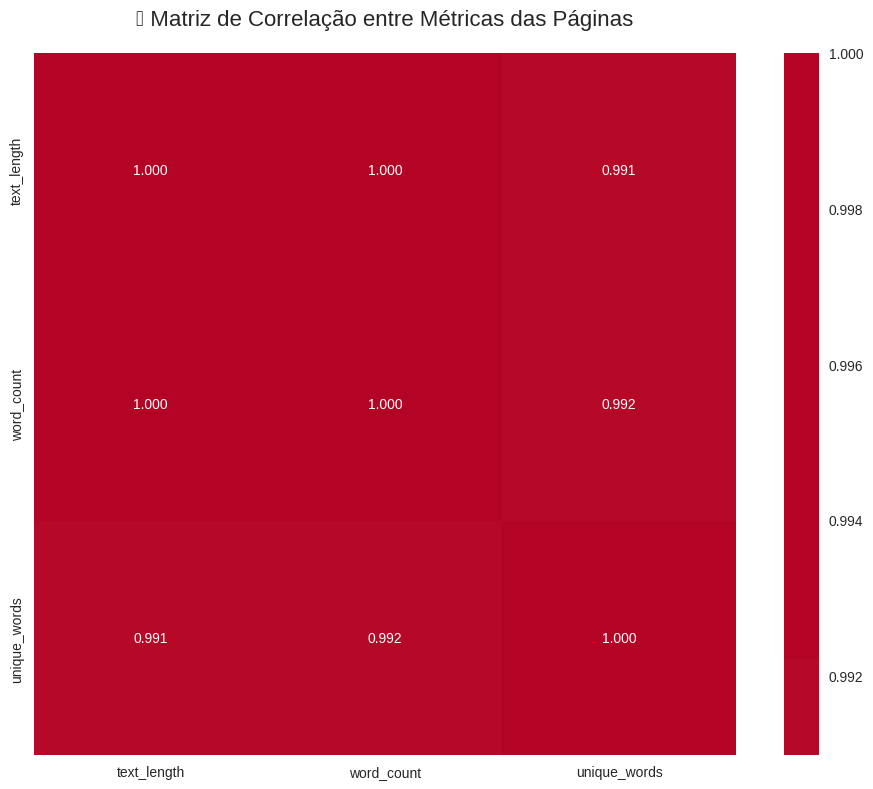


💡 INSIGHTS:
   📏 Correlação Tamanho do Texto ↔ Número de Palavras: 1.000
   🔤 Correlação Número de Palavras ↔ Palavras Únicas: 0.992
   ✅ Forte correlação positiva entre tamanho do texto e número de palavras
   ✅ Forte correlação positiva entre número total e palavras únicas


In [11]:
# 🔍 Análise de correlações
if not df_pages.empty:
    print("🔗 ANÁLISE DE CORRELAÇÕES")
    print("=" * 30)

    # Matriz de correlação
    correlation_matrix = df_pages[['text_length', 'word_count', 'unique_words']].corr()

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                fmt='.3f')
    plt.title('🔥 Matriz de Correlação entre Métricas das Páginas', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Insights
    print("\n💡 INSIGHTS:")
    corr_text_words = correlation_matrix.loc['text_length', 'word_count']
    corr_words_unique = correlation_matrix.loc['word_count', 'unique_words']

    print(f"   📏 Correlação Tamanho do Texto ↔ Número de Palavras: {corr_text_words:.3f}")
    print(f"   🔤 Correlação Número de Palavras ↔ Palavras Únicas: {corr_words_unique:.3f}")

    if corr_text_words > 0.7:
        print("   ✅ Forte correlação positiva entre tamanho do texto e número de palavras")
    if corr_words_unique > 0.7:
        print("   ✅ Forte correlação positiva entre número total e palavras únicas")

🌈 ANÁLISE DE DIVERSIDADE LEXICAL
📊 Diversidade Lexical Média: 0.679
📈 Desvio Padrão: 0.160


/tmp/ipython-input-2941251342.py:35: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.

/tmp/ipython-input-2941251342.py:35: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.



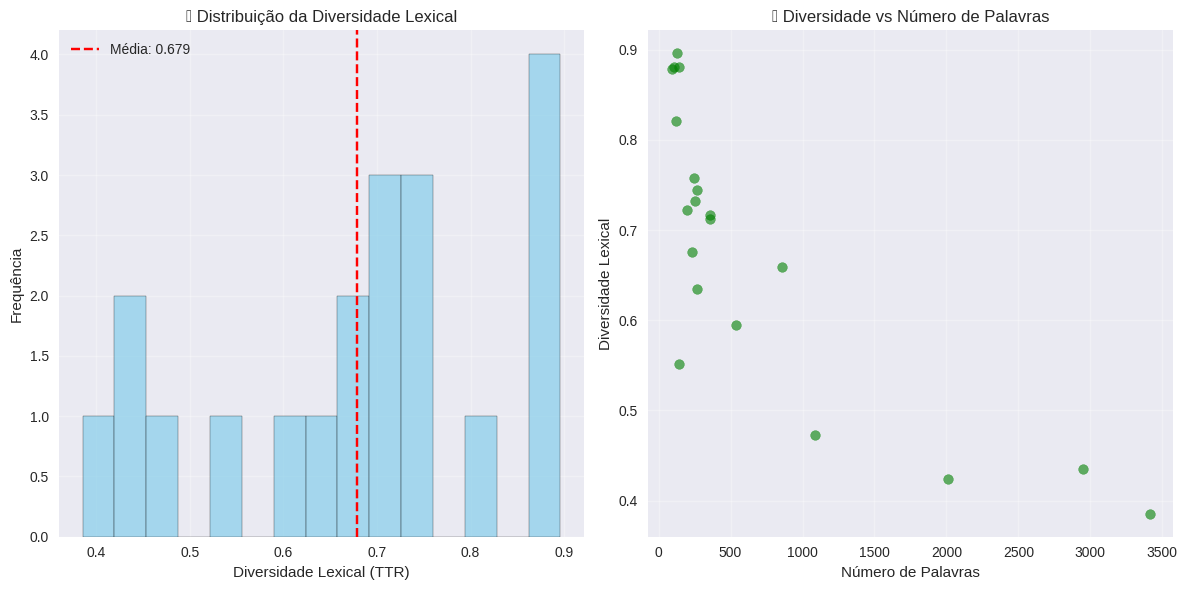


🏆 TOP 3 PÁGINAS COM MAIOR DIVERSIDADE LEXICAL:
1. Diversidade: 0.896
   URL: https://apps.univesp.br/repositorio/voce-no-mercado-de-trabalho-ii/...
   Palavras: 125 | Únicas: 112

2. Diversidade: 0.881
   URL: https://apps.univesp.br/repositorio/letramento-racial/...
   Palavras: 143 | Únicas: 126

3. Diversidade: 0.881
   URL: https://univesp.br...
   Palavras: 109 | Únicas: 96



In [12]:
# 📊 Análise de diversidade lexical
if not df_pages.empty:
    print("🌈 ANÁLISE DE DIVERSIDADE LEXICAL")
    print("=" * 35)

    # Calcular diversidade lexical (Type-Token Ratio)
    df_pages['diversidade_lexical'] = df_pages['unique_words'] / df_pages['word_count']

    # Estatísticas
    diversidade_media = df_pages['diversidade_lexical'].mean()
    diversidade_std = df_pages['diversidade_lexical'].std()

    print(f"📊 Diversidade Lexical Média: {diversidade_media:.3f}")
    print(f"📈 Desvio Padrão: {diversidade_std:.3f}")

    # Gráfico de distribuição
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(df_pages['diversidade_lexical'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(diversidade_media, color='red', linestyle='--', label=f'Média: {diversidade_media:.3f}')
    plt.xlabel('Diversidade Lexical (TTR)')
    plt.ylabel('Frequência')
    plt.title('📊 Distribuição da Diversidade Lexical')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.scatter(df_pages['word_count'], df_pages['diversidade_lexical'], alpha=0.6, color='green')
    plt.xlabel('Número de Palavras')
    plt.ylabel('Diversidade Lexical')
    plt.title('📈 Diversidade vs Número de Palavras')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Páginas com maior diversidade
    top_diversidade = df_pages.nlargest(3, 'diversidade_lexical')

    print("\n🏆 TOP 3 PÁGINAS COM MAIOR DIVERSIDADE LEXICAL:")
    for i, (idx, row) in enumerate(top_diversidade.iterrows(), 1):
        print(f"{i}. Diversidade: {row['diversidade_lexical']:.3f}")
        print(f"   URL: {row['url'][:80]}...")
        print(f"   Palavras: {row['word_count']} | Únicas: {row['unique_words']}\n")

# 6️⃣ Relatórios e Exportação

Vamos gerar relatórios finais e preparar os dados para download.

In [13]:
# 📋 Relatório final consolidado
def gerar_relatorio_final():
    if not crawler.visited_urls:
        print("❌ Nenhum dado disponível para relatório")
        return

    print("📋 RELATÓRIO FINAL - WEB CRAWLER UNIVESP")
    print("=" * 50)
    print(f"🕷️ Executado em: {datetime.now().strftime('%d/%m/%Y às %H:%M:%S')}")
    print(f"🌐 URL Base: {BASE_URL}")
    print()

    # Estatísticas do Crawling
    print("📊 ESTATÍSTICAS DO CRAWLING:")
    print("-" * 30)
    print(f"✅ Páginas visitadas com sucesso: {len(crawler.visited_urls)}")
    print(f"❌ Páginas com erro: {len(crawler.failed_urls)}")
    print(f"🎯 Taxa de sucesso: {len(crawler.visited_urls)/(len(crawler.visited_urls)+len(crawler.failed_urls))*100:.1f}%")
    print()

    # Análise de Texto
    print("📝 ANÁLISE DE TEXTO:")
    print("-" * 20)
    print(f"🔤 Total de palavras únicas: {len(crawler.word_frequency):,}")
    print(f"📊 Total de ocorrências: {sum(crawler.word_frequency.values()):,}")
    print(f"📄 Média de palavras por página: {df_pages['word_count'].mean():.1f}")
    print(f"🌈 Diversidade lexical média: {df_pages['diversidade_lexical'].mean():.3f}")
    print()

    # Top palavras
    print("🏆 TOP 10 PALAVRAS MAIS FREQUENTES:")
    print("-" * 35)
    for i, (palavra, freq) in enumerate(crawler.word_frequency.most_common(10), 1):
        print(f"{i:2d}. {palavra:<20} : {freq:>4} ocorrências")
    print()

    # Análise por domínios temáticos
    palavras_educacao = ['curso', 'ensino', 'educação', 'aprendizagem', 'estudo', 'aluno', 'professor']
    palavras_tecnologia = ['tecnologia', 'computação', 'dados', 'sistema', 'digital', 'informática']

    freq_educacao = sum(crawler.word_frequency.get(palavra, 0) for palavra in palavras_educacao)
    freq_tecnologia = sum(crawler.word_frequency.get(palavra, 0) for palavra in palavras_tecnologia)

    print("🎓 ANÁLISE TEMÁTICA:")
    print("-" * 20)
    print(f"📚 Palavras relacionadas à Educação: {freq_educacao} ocorrências")
    print(f"💻 Palavras relacionadas à Tecnologia: {freq_tecnologia} ocorrências")

    if freq_educacao > freq_tecnologia:
        print("📊 Foco predominante: Educação")
    else:
        print("📊 Foco predominante: Tecnologia")

    print("\n" + "=" * 50)
    print("✅ Relatório gerado com sucesso!")

# Gerar relatório
gerar_relatorio_final()

📋 RELATÓRIO FINAL - WEB CRAWLER UNIVESP
🕷️ Executado em: 17/08/2025 às 19:12:12
🌐 URL Base: https://univesp.br

📊 ESTATÍSTICAS DO CRAWLING:
------------------------------
✅ Páginas visitadas com sucesso: 20
❌ Páginas com erro: 0
🎯 Taxa de sucesso: 100.0%

📝 ANÁLISE DE TEXTO:
--------------------
🔤 Total de palavras únicas: 3,884
📊 Total de ocorrências: 13,785
📄 Média de palavras por página: 689.2
🌈 Diversidade lexical média: 0.679

🏆 TOP 10 PALAVRAS MAIS FREQUENTES:
-----------------------------------
 1. univesp              :  185 ocorrências
 2. educação             :  103 ocorrências
 3. hospitalar           :   92 ocorrências
 4. escola               :   60 ocorrências
 5. curso                :   60 ocorrências
 6. inclusão             :   55 ocorrências
 7. ensino               :   54 ocorrências
 8. cursos               :   47 ocorrências
 9. universidade         :   47 ocorrências
10. classe               :   47 ocorrências

🎓 ANÁLISE TEMÁTICA:
--------------------
📚 Palavras 

In [14]:
# 💾 Preparar dados para download
from google.colab import files
import json

print("💾 PREPARANDO DADOS PARA DOWNLOAD")
print("=" * 35)

# 1. Salvar frequência de palavras como CSV
df_words_full = crawler.get_word_frequency_df(1000)  # Top 1000 palavras
df_words_full.to_csv('univesp_frequencia_palavras.csv', index=False, encoding='utf-8')
print("✅ Arquivo CSV criado: univesp_frequencia_palavras.csv")

# 2. Salvar dados das páginas como CSV
df_pages_export = df_pages.copy()
df_pages_export['timestamp'] = df_pages_export['timestamp'].astype(str)
df_pages_export.to_csv('univesp_dados_paginas.csv', index=False, encoding='utf-8')
print("✅ Arquivo CSV criado: univesp_dados_paginas.csv")

# 3. Salvar relatório como JSON
relatorio_json = {
    'metadata': {
        'data_execucao': datetime.now().isoformat(),
        'url_base': BASE_URL,
        'max_pages': MAX_PAGES,
        'delay': DELAY
    },
    'estatisticas': {
        'paginas_visitadas': len(crawler.visited_urls),
        'paginas_com_erro': len(crawler.failed_urls),
        'palavras_unicas': len(crawler.word_frequency),
        'total_ocorrencias': sum(crawler.word_frequency.values()),
        'diversidade_lexical_media': float(df_pages['diversidade_lexical'].mean()) if 'diversidade_lexical' in df_pages.columns else 0
    },
    'top_palavras': dict(crawler.word_frequency.most_common(50)),
    'urls_visitadas': list(crawler.visited_urls),
    'urls_com_erro': list(crawler.failed_urls)
}

with open('univesp_relatorio_completo.json', 'w', encoding='utf-8') as f:
    json.dump(relatorio_json, f, ensure_ascii=False, indent=2)
print("✅ Arquivo JSON criado: univesp_relatorio_completo.json")

# 4. Criar arquivo README para os dados
readme_content = f"""
# 📊 Dados do Web Crawler - Univesp

## 📋 Descrição
Dados coletados pelo web crawler da Univesp executado em {datetime.now().strftime('%d/%m/%Y às %H:%M:%S')}.

## 📁 Arquivos Inclusos:
- **univesp_frequencia_palavras.csv**: Top 1000 palavras mais frequentes
- **univesp_dados_paginas.csv**: Dados detalhados de cada página visitada
- **univesp_relatorio_completo.json**: Relatório completo em formato JSON
- **README.md**: Este arquivo de documentação

## 📊 Estatísticas:
- 🌐 **URL Base**: {BASE_URL}
- 📄 **Páginas Processadas**: {len(crawler.visited_urls)}
- 🔤 **Palavras Únicas**: {len(crawler.word_frequency):,}
- 📊 **Total de Ocorrências**: {sum(crawler.word_frequency.values()):,}

## 🏆 Top 10 Palavras:
"""

for i, (palavra, freq) in enumerate(crawler.word_frequency.most_common(10), 1):
    readme_content += f"{i:2d}. **{palavra}**: {freq} ocorrências\n"

readme_content += f"""

## 🛠️ Como Usar:
1. Abra os arquivos CSV em Excel, Google Sheets ou pandas
2. Use o arquivo JSON para análises programáticas
3. Consulte este README para entender a estrutura dos dados

---
*Gerado pelo Web Crawler da Univesp - Notebook do Google Colab*
"""

with open('README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)
print("✅ Arquivo README criado: README.md")

print("\n📦 Todos os arquivos estão prontos para download!")
print("💡 Use o menu Files → Download para baixar os arquivos individualmente")
print("💡 Ou execute a célula abaixo para download automático")

💾 PREPARANDO DADOS PARA DOWNLOAD
✅ Arquivo CSV criado: univesp_frequencia_palavras.csv
✅ Arquivo CSV criado: univesp_dados_paginas.csv
✅ Arquivo JSON criado: univesp_relatorio_completo.json
✅ Arquivo README criado: README.md

📦 Todos os arquivos estão prontos para download!
💡 Use o menu Files → Download para baixar os arquivos individualmente
💡 Ou execute a célula abaixo para download automático


In [15]:
# 📥 Download automático dos arquivos (opcional)
print("📥 Iniciando download dos arquivos...")
print("(Os arquivos serão baixados para sua pasta de Downloads)")

try:
    files.download('univesp_frequencia_palavras.csv')
    files.download('univesp_dados_paginas.csv')
    files.download('univesp_relatorio_completo.json')
    files.download('README.md')
    print("\n✅ Download concluído com sucesso!")
except Exception as e:
    print(f"⚠️ Erro no download automático: {e}")
    print("💡 Use o menu Files para download manual")

📥 Iniciando download dos arquivos...
(Os arquivos serão baixados para sua pasta de Downloads)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download concluído com sucesso!


# 🚀 Publicando no GitHub

## 📝 Guia Completo para Publicar este Projeto no GitHub

### 🌟 **Opção 1: Publicação Direta do Colab**

1. **Salvar no GitHub diretamente:**
   - No Colab: `File` → `Save a copy in GitHub`
   - Escolha seu repositório ou crie um novo
   - Adicione uma mensagem de commit
   - Clique em `OK`

### 🛠️ **Opção 2: Processo Manual Completo**

#### **Passo 1: Preparar o Repositório**
1. Acesse [GitHub.com](https://github.com)
2. Clique em `New Repository`
3. Nome sugerido: `univesp-web-crawler`
4. Adicione descrição: `🕷️ Web Crawler da Univesp com análise de frequência de palavras`
5. Marque `Add a README file`
6. Clique `Create repository`

#### **Passo 2: Estrutura de Arquivos Recomendada**
```
univesp-web-crawler/
├── Univesp_Web_Crawler_Colab.ipynb    # Este notebook
├── README.md                           # Documentação principal
├── data/                              # Dados coletados
│   ├── univesp_frequencia_palavras.csv
│   ├── univesp_dados_paginas.csv
│   └── univesp_relatorio_completo.json
├── images/                            # Screenshots e gráficos
│   ├── wordcloud.png
│   └── graficos_analise.png
└── requirements.txt                   # Dependências do projeto
```

#### **Passo 3: Criar README.md Profissional**

## 📋 **Instruções Finais para Publicação**

### ✅ **Checklist Completo:**

1. **✅ Preparar Arquivos:**
   - [ ] Download do notebook (.ipynb)
   - [ ] README.md profissional
   - [ ] requirements.txt
   - [ ] Dados coletados (CSV/JSON)
   - [ ] Screenshots das visualizações

2. **✅ Criar Repositório GitHub:**
   - [ ] Nome: `univesp-web-crawler`
   - [ ] Descrição detalhada
   - [ ] README inicial
   - [ ] Licença MIT

3. **✅ Upload dos Arquivos:**
   - [ ] Notebook principal
   - [ ] Documentação
   - [ ] Pasta `data/` com resultados
   - [ ] Pasta `images/` com gráficos

4. **✅ Configurações Finais:**
   - [ ] Topics/Tags: `web-crawler`, `data-science`, `python`, `univesp`
   - [ ] GitHub Pages (opcional)
   - [ ] Badge do Colab atualizado

### 🎯 **Dicas para Destaque:**

- **📸 Screenshots**: Inclua imagens das visualizações no README
- **🎬 GIF Demonstrativo**: Grave um GIF da execução do notebook
- **📊 Dados de Exemplo**: Mantenha alguns resultados como exemplo
- **🏷️ Tags Relevantes**: Use tags para facilitar descoberta
- **⭐ Call-to-Action**: Incentive outros a dar estrela no projeto

### 🚀 **Próximos Passos:**

1. **Execute todas as células** deste notebook
2. **Baixe todos os arquivos** gerados
3. **Crie o repositório** no GitHub
4. **Faça upload** dos arquivos
5. **Teste o badge** do Colab
6. **Compartilhe** seu projeto!

---

**🎉 Parabéns! Seu projeto está pronto para brilhar no GitHub! 🌟**